Course = BIL 470 / HOMEWORK 2<br>                                                                                                Name   = MERT CAN GÖNEN<br>
ID     = 181101039

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from LR import LineerRegressionModel

# <span style="color: red;">Exploratory Data Analysis (EDA)</span>

### <span style="color: darkblue;">Read Dataset</span> 

In [2]:
data = pd.read_csv("data.csv");

In [3]:
display(data);

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


Improve dataset: Remove Gender column which is not affecting the result.

In [4]:
data = data.drop(columns="Gender");
display(data);

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


Summary of each Features data:

In [5]:
h = data["Height"].describe();
w = data["Weight"].describe();
i = data["Index"].describe();
print(h);
print("\n");
print(w);
print("\n");
print(i);

count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64


count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64


count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


Duplicit data in dataset:

In [6]:
display(data[data.duplicated()]);

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


Drop duplicate values:

In [7]:
data.drop_duplicates(subset=None, inplace=True);
display(data[data.duplicated()]);

,Height,Weight,Index


There is no more duplicate values.

In [8]:
h = data["Height"].describe();
w = data["Weight"].describe();
i = data["Index"].describe();
print(h);
print("\n");
print(w);
print("\n");
print(i);

count    476.000000
mean     169.878151
std       16.332011
min      140.000000
25%      156.000000
50%      170.000000
75%      184.000000
max      199.000000
Name: Height, dtype: float64


count    476.000000
mean     106.920168
std       32.319945
min       50.000000
25%       80.000000
50%      107.000000
75%      137.000000
max      160.000000
Name: Weight, dtype: float64


count    476.000000
mean       3.779412
std        1.337585
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


Index Distribution

C:\Users\mgone\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


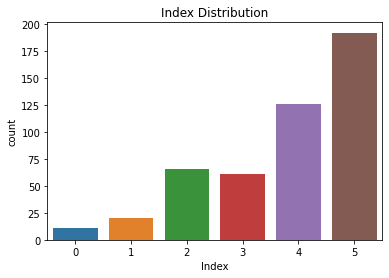

In [9]:
plt.title("Index Distribution");
sns.countplot(data["Index"]);

Height Distribution

C:\Users\mgone\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


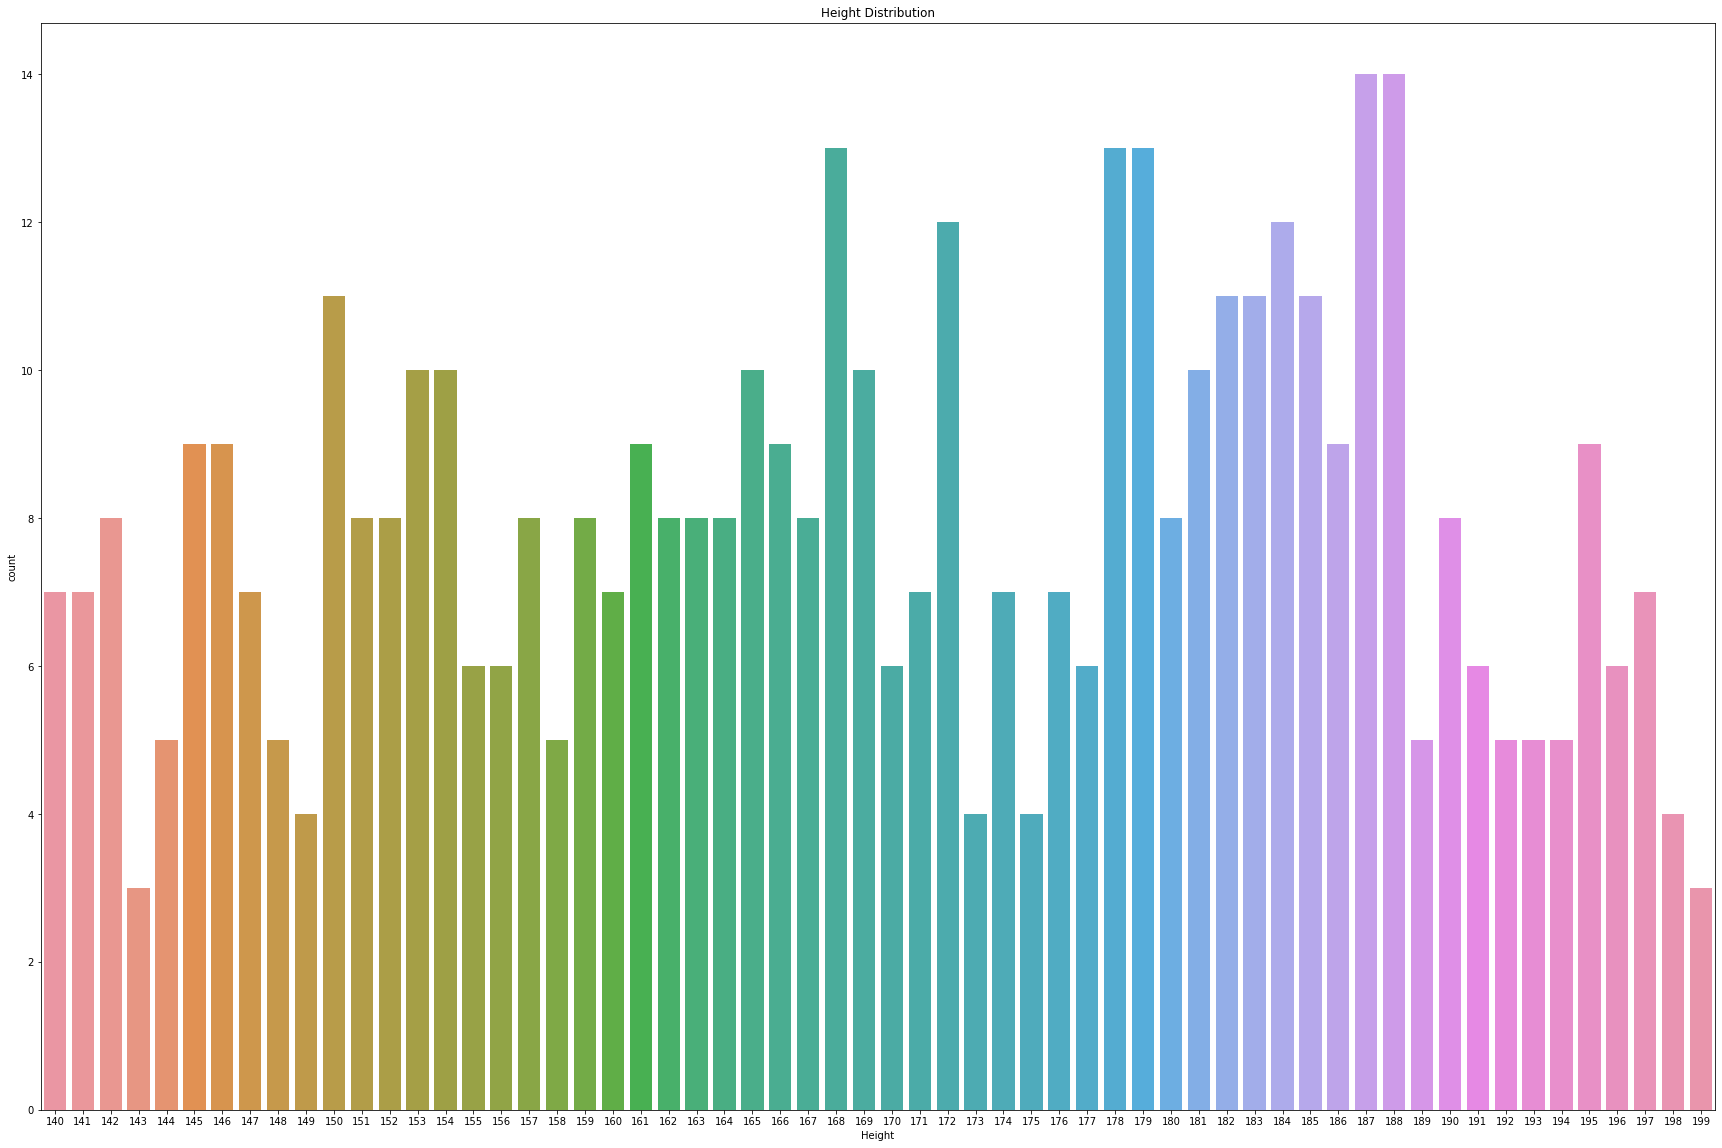

In [10]:
plt.figure(figsize=(30, 20));
plt.title("Height Distribution");
sns.countplot(data["Height"]);

Weight Distribution

C:\Users\mgone\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


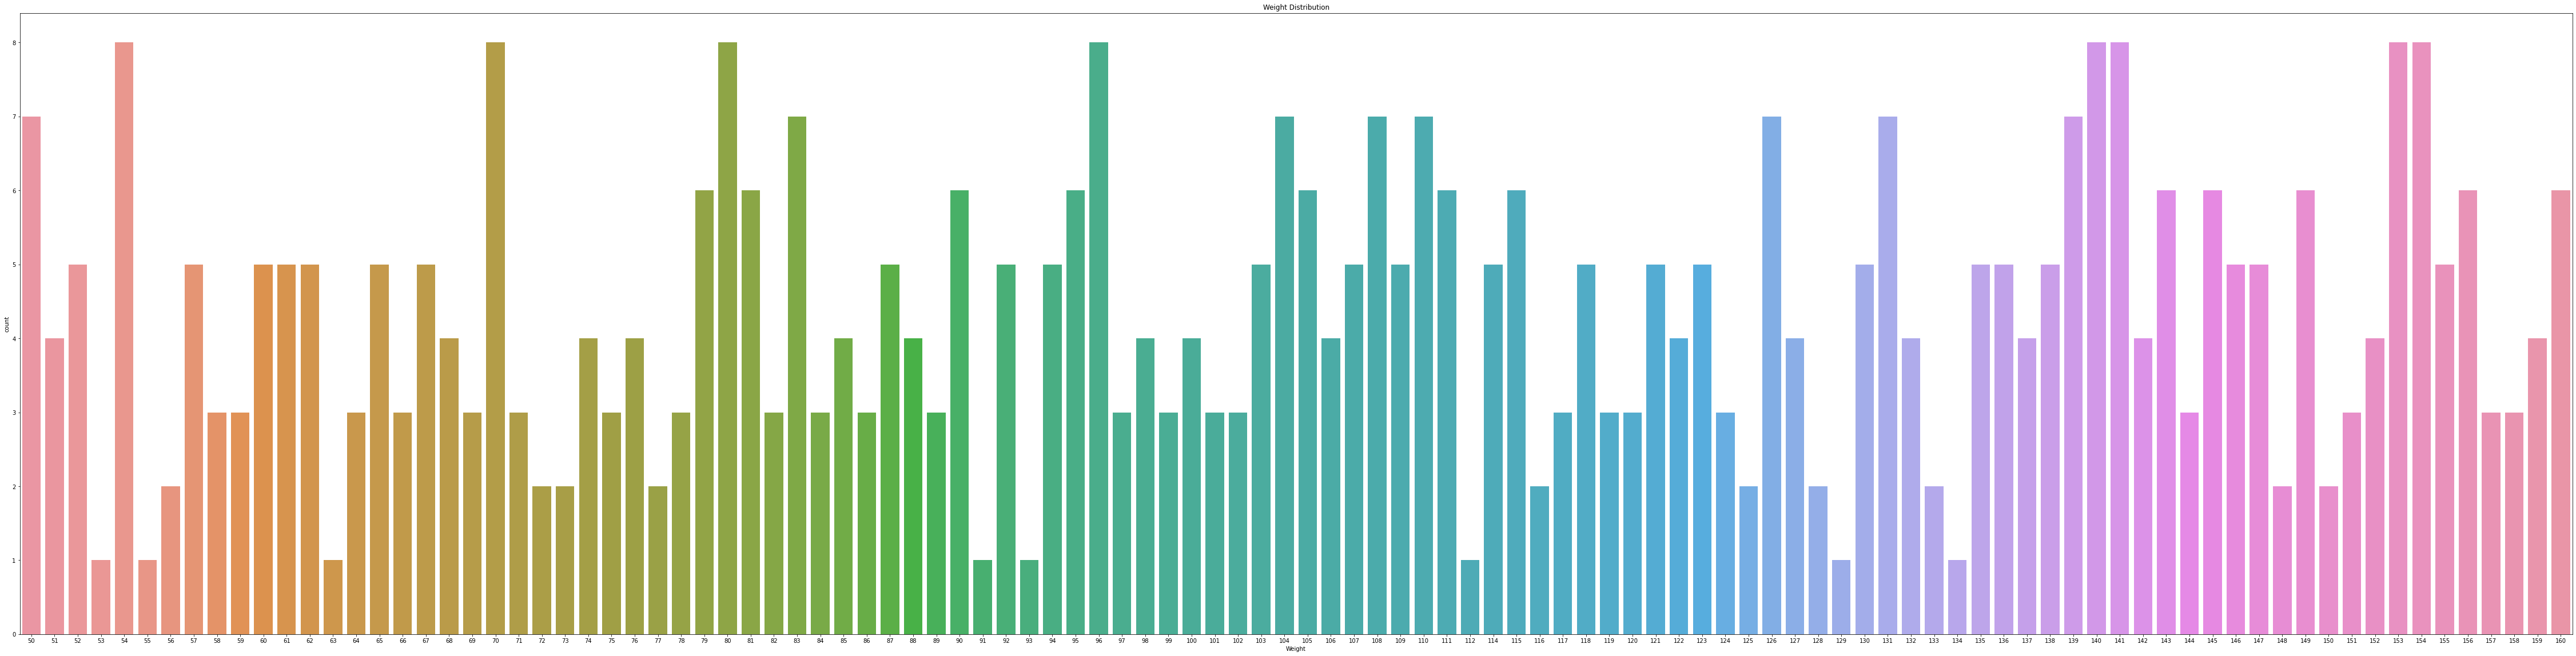

In [11]:
plt.figure(figsize=(80, 20));
plt.title("Weight Distribution");
sns.countplot(data["Weight"]);

Data on the 2D data space.

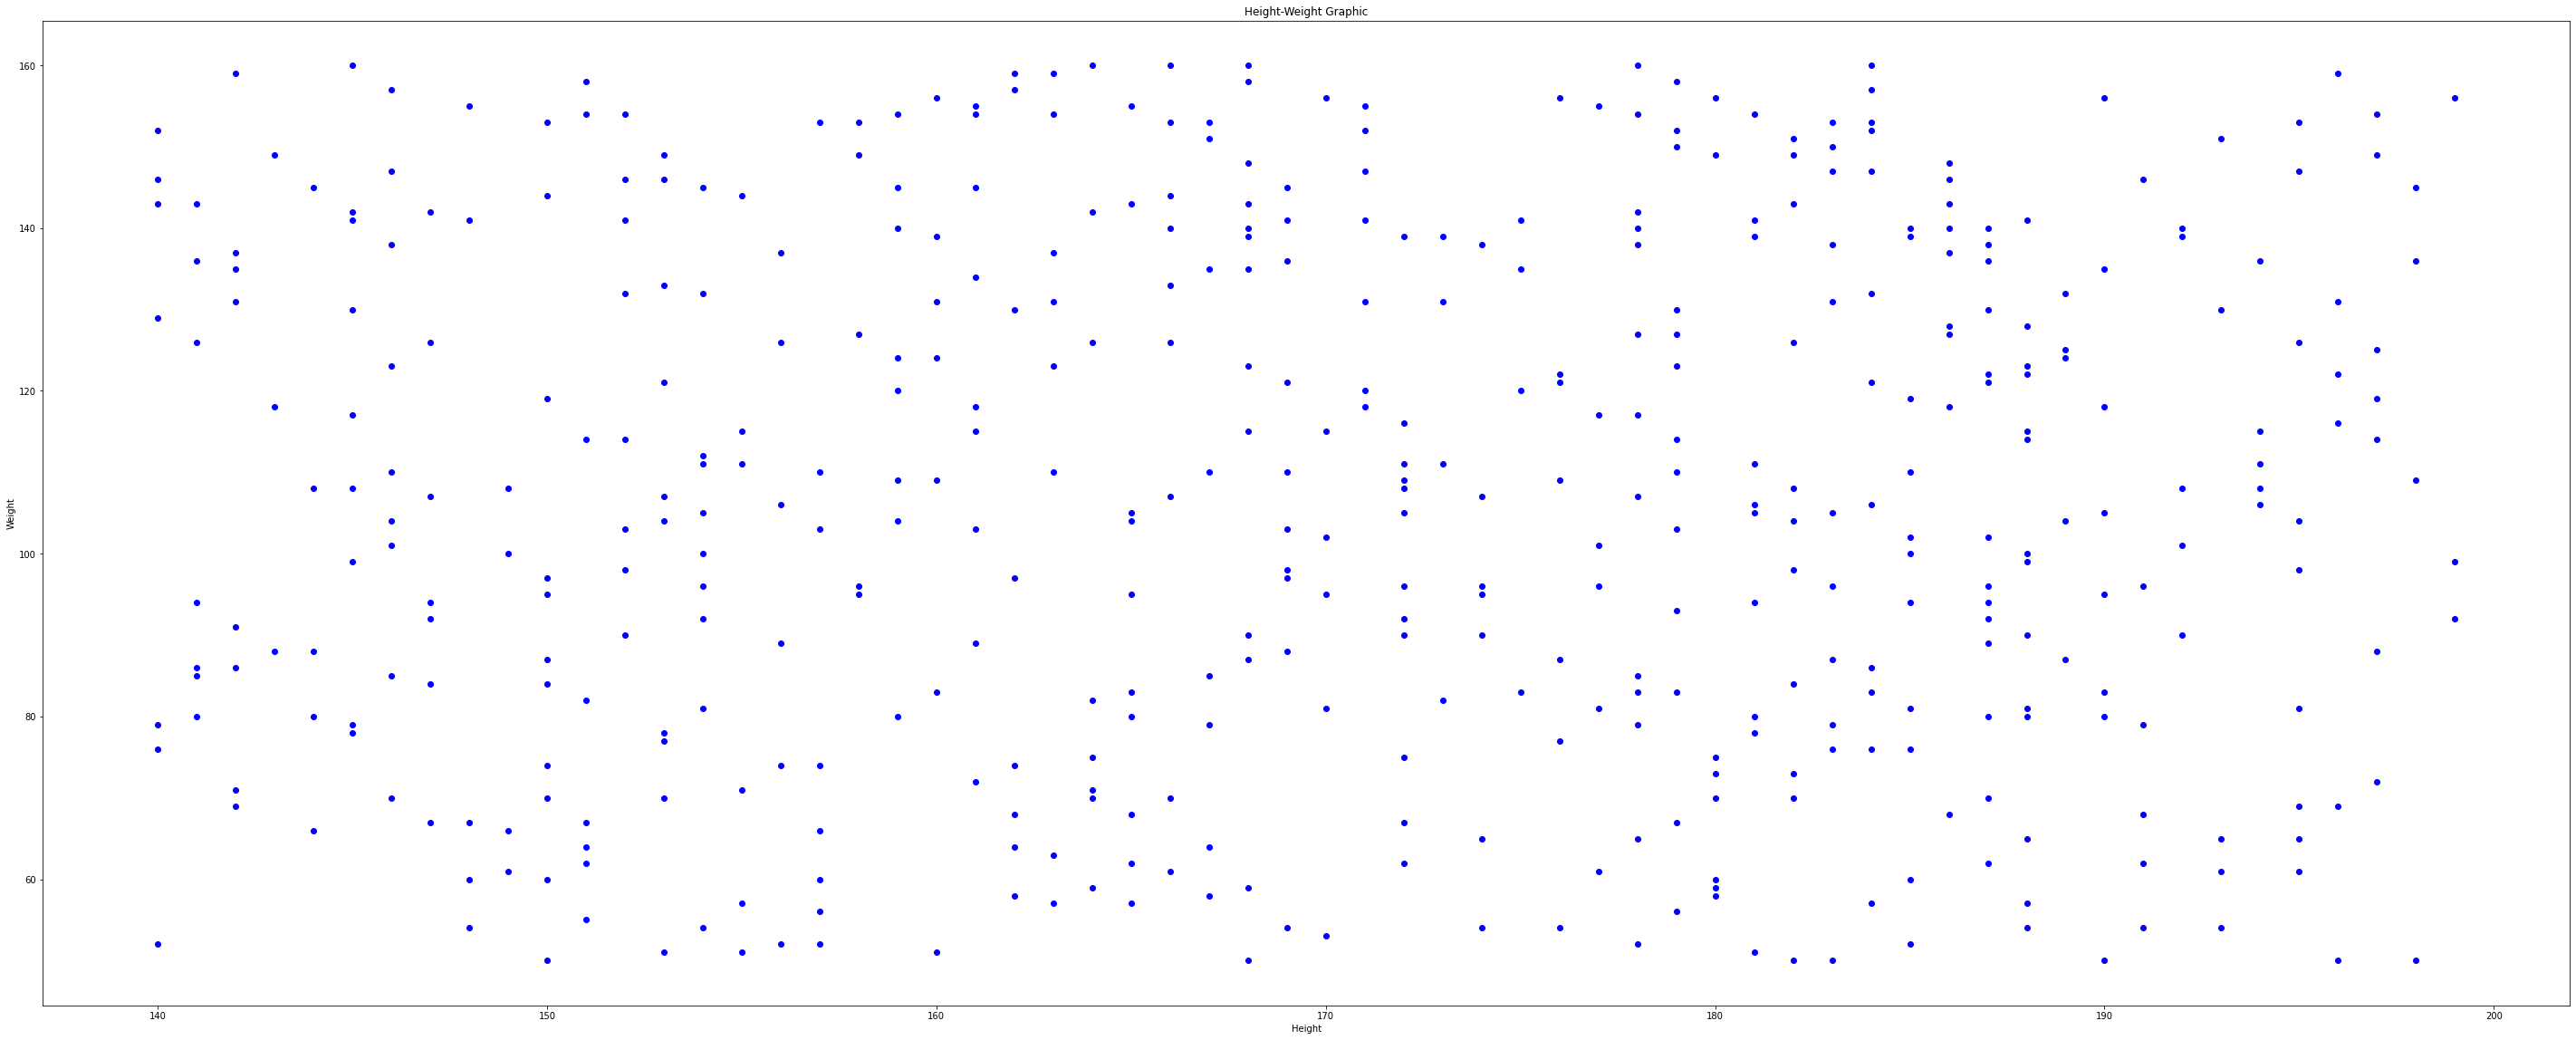

In [12]:
x = data["Height"].values.tolist();
y = data["Weight"].values.tolist();

plt.figure(figsize=(50, 20));  
plt.title("Height-Weight Graphic")    
plt.scatter(x, y, label= "dot", color= "red", 
            marker= ".", s=20)    
    
plt.plot(x, y, "bo")
    
plt.xlabel("Height")
plt.ylabel("Weight")
  
plt.show()

# <span style="color: red;">Lineer Regression Model</span>

## <span style="color: darkblue;">Training</span>

We split height, weight and index values to equal two parts. We will use first half of the data to traing our model. Data is already mixed. We can take first half of it as training data and the second half as test data.

In [13]:
D = data.values.tolist();

X = data["Height"].values.tolist();
Y = data["Weight"].values.tolist();
Z = data["Index"].values.tolist();

x_train = X[:len(X)//2];
y_train = Y[:len(Y)//2];
z_train = Z[:len(Z)//2];

x_test = X[len(X)//2:];
y_test = Y[len(Y)//2:];
z_test = Z[len(Z)//2:];

Create Lineer Regression Decider and calculate Loss, m1, m2 and b values using epoch and learning rate.

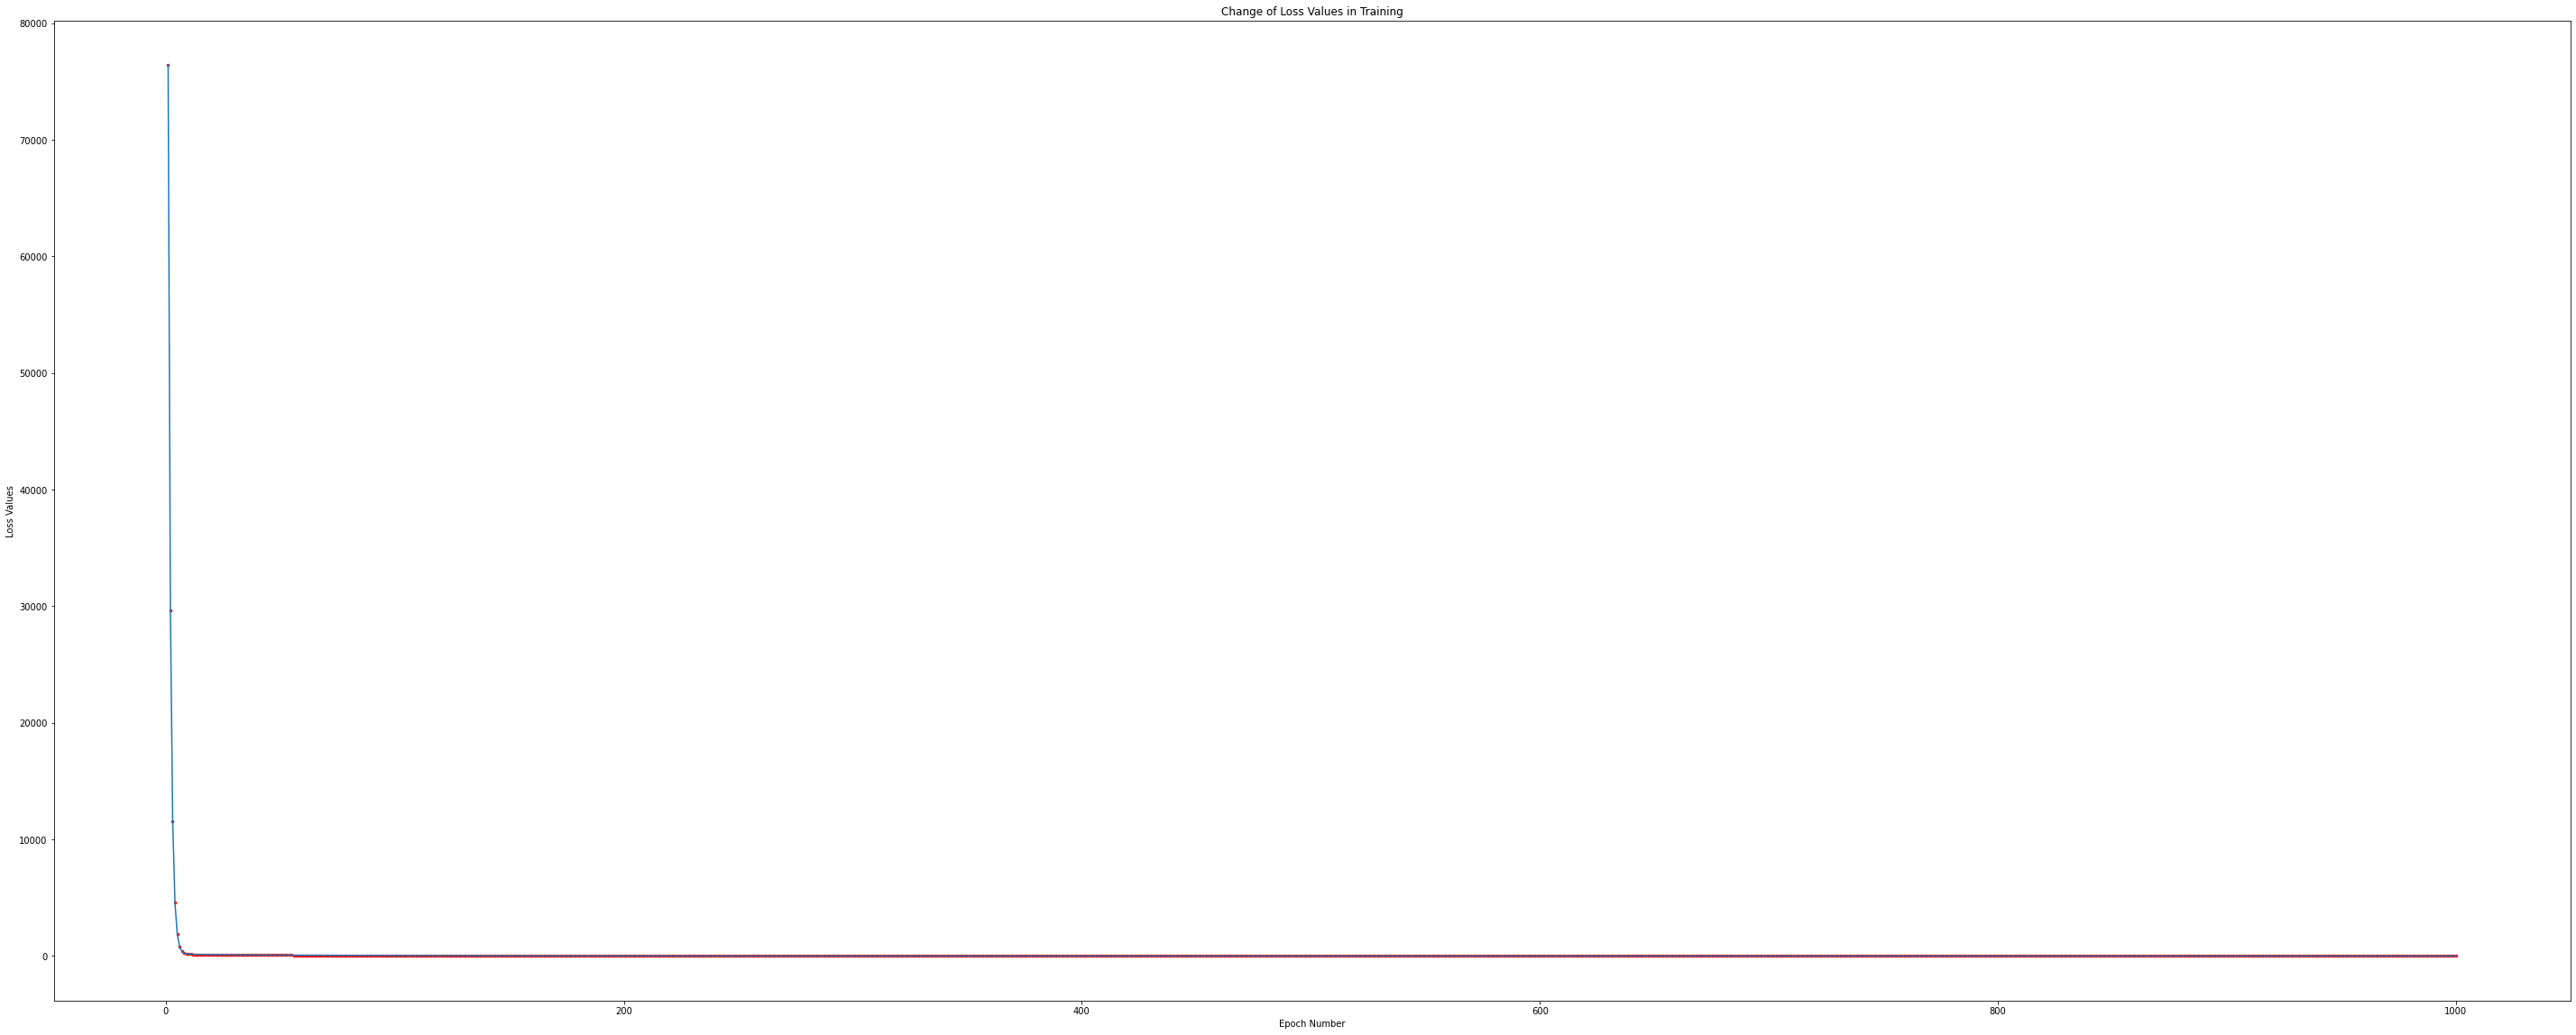

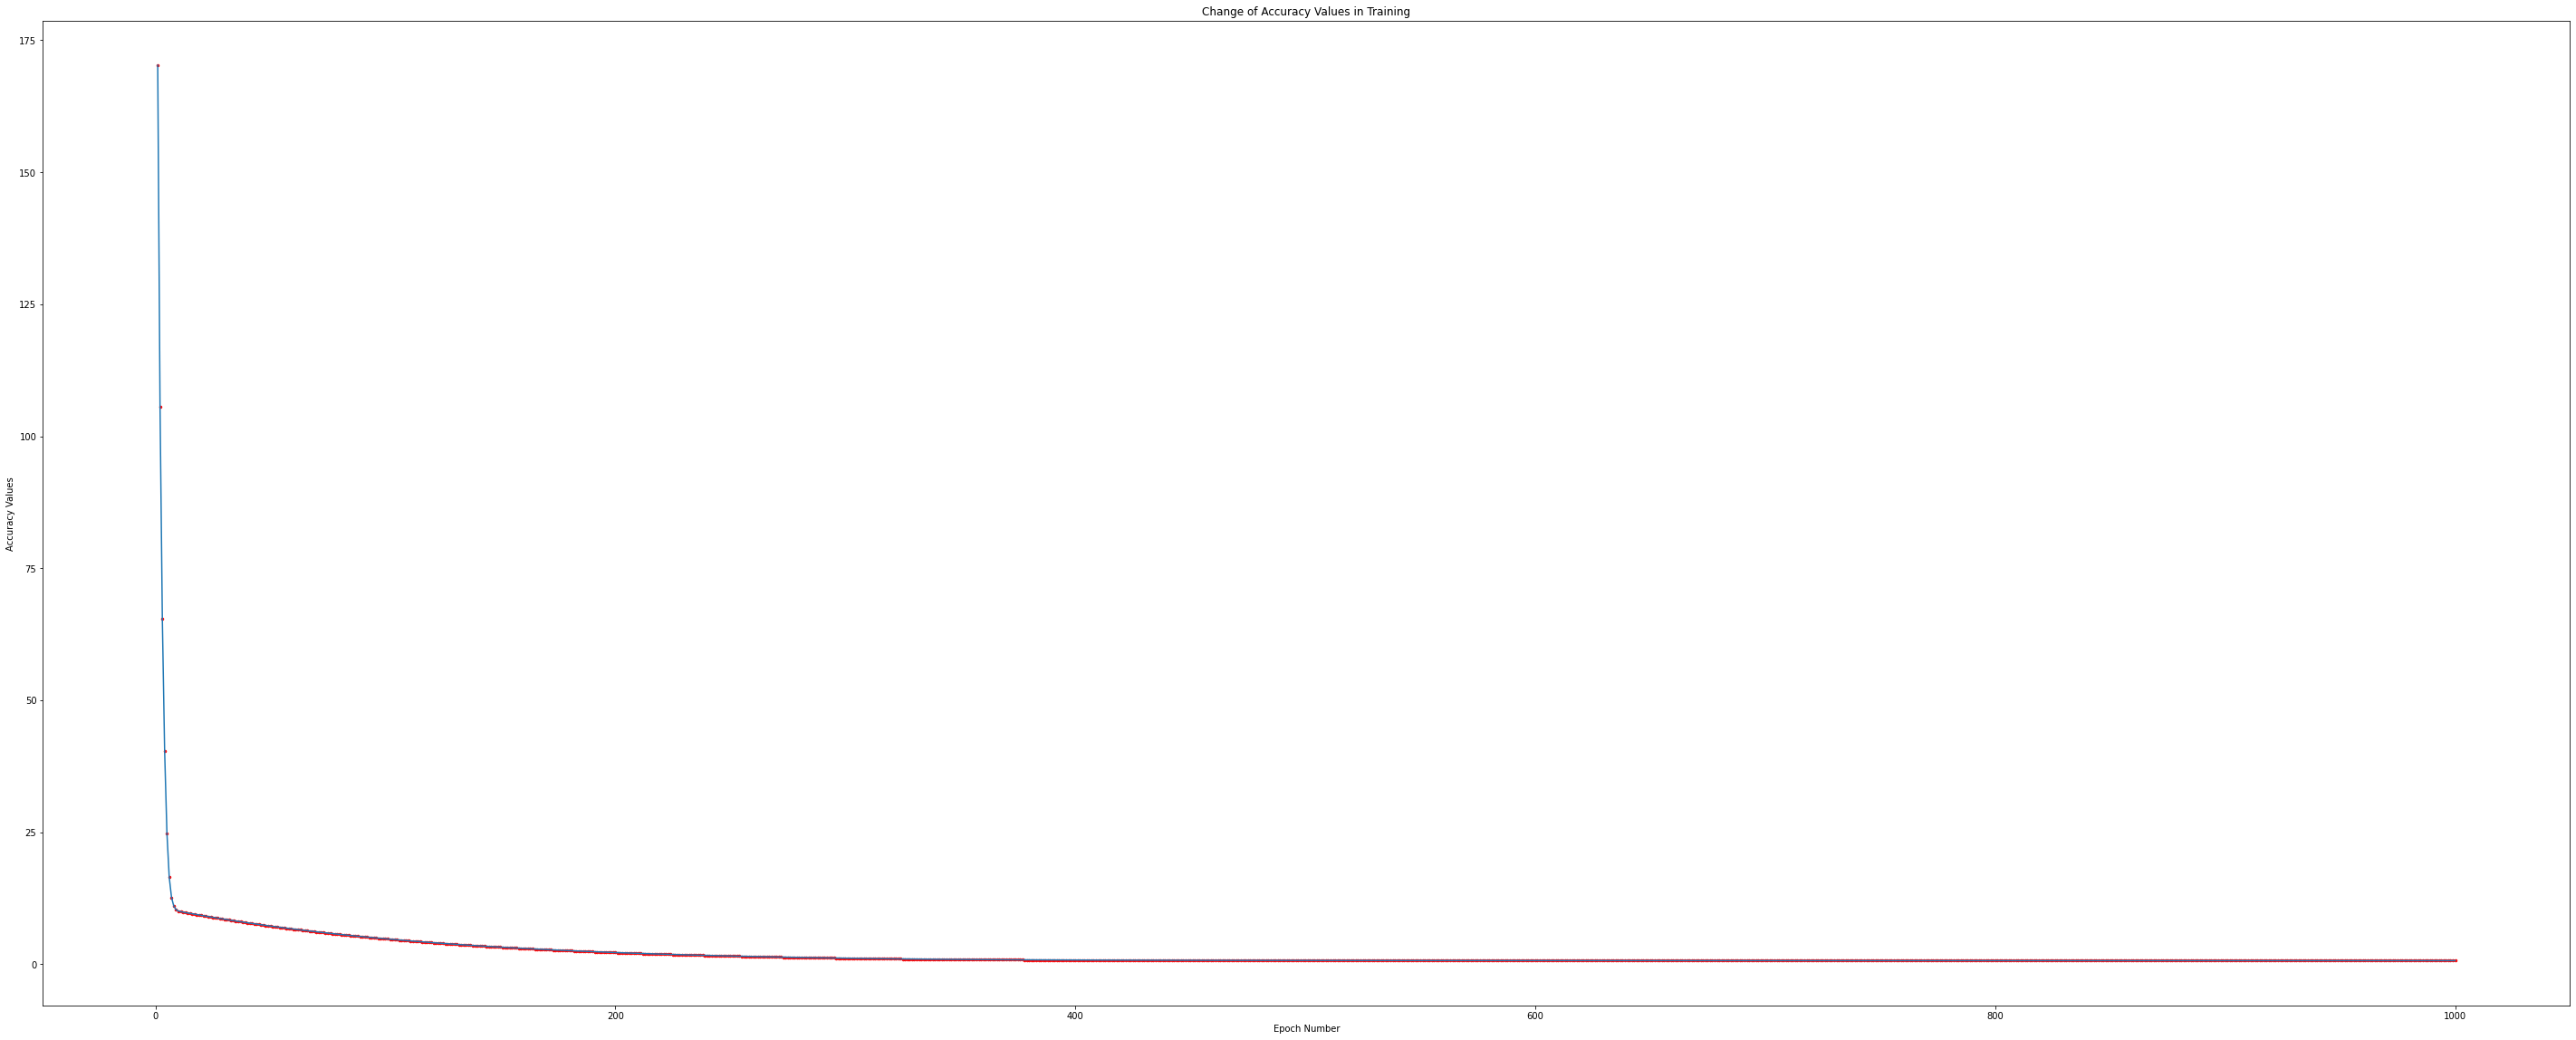

Description of Loss Values in Training
                  0
count   1000.000000
mean     135.167716
std     2620.847244
min        0.683892
25%        0.684526
50%        0.724378
75%        3.296848
max    76424.911765

Description of Accuracy Values in Training
                 0
count  1000.000000
mean      2.092425
std       7.040328
min       0.668142
25%       0.670595
50%       0.701266
75%       1.539085
max     170.266689


In [14]:
lrm = LineerRegressionModel(learning_rate=0.000005, epoch=1000);
return_lists = lrm.fit(x_train, y_train, z_train, x_test, y_test, z_test);
loss_values = return_lists[0];
accuracy_values = return_lists[1];

y=np.arange(1,1001);

plt.figure(figsize=(50, 20));
plt.plot(y, loss_values);

plt.title("Change of Loss Values in Training");
plt.xlabel("Epoch Number");
plt.ylabel("Loss Values");

plt.scatter(y, loss_values, label= "dot", color= "red", marker= ".", s=25);

plt.show();

plt.figure(figsize=(50, 20));
plt.plot(y, accuracy_values);

plt.title("Change of Accuracy Values in Training");
plt.xlabel("Epoch Number");
plt.ylabel("Accuracy Values");

plt.scatter(y, accuracy_values, label= "dot", color= "red", marker= ".", s=25);

plt.show();

print("Description of Loss Values in Training");
df = pd.DataFrame(loss_values);
x = df.describe();
print(x);
print();
print("Description of Accuracy Values in Training");
df2 = pd.DataFrame(accuracy_values);
y = df2.describe();
print(y);

## <span style="color: darkblue;">Testing</span>

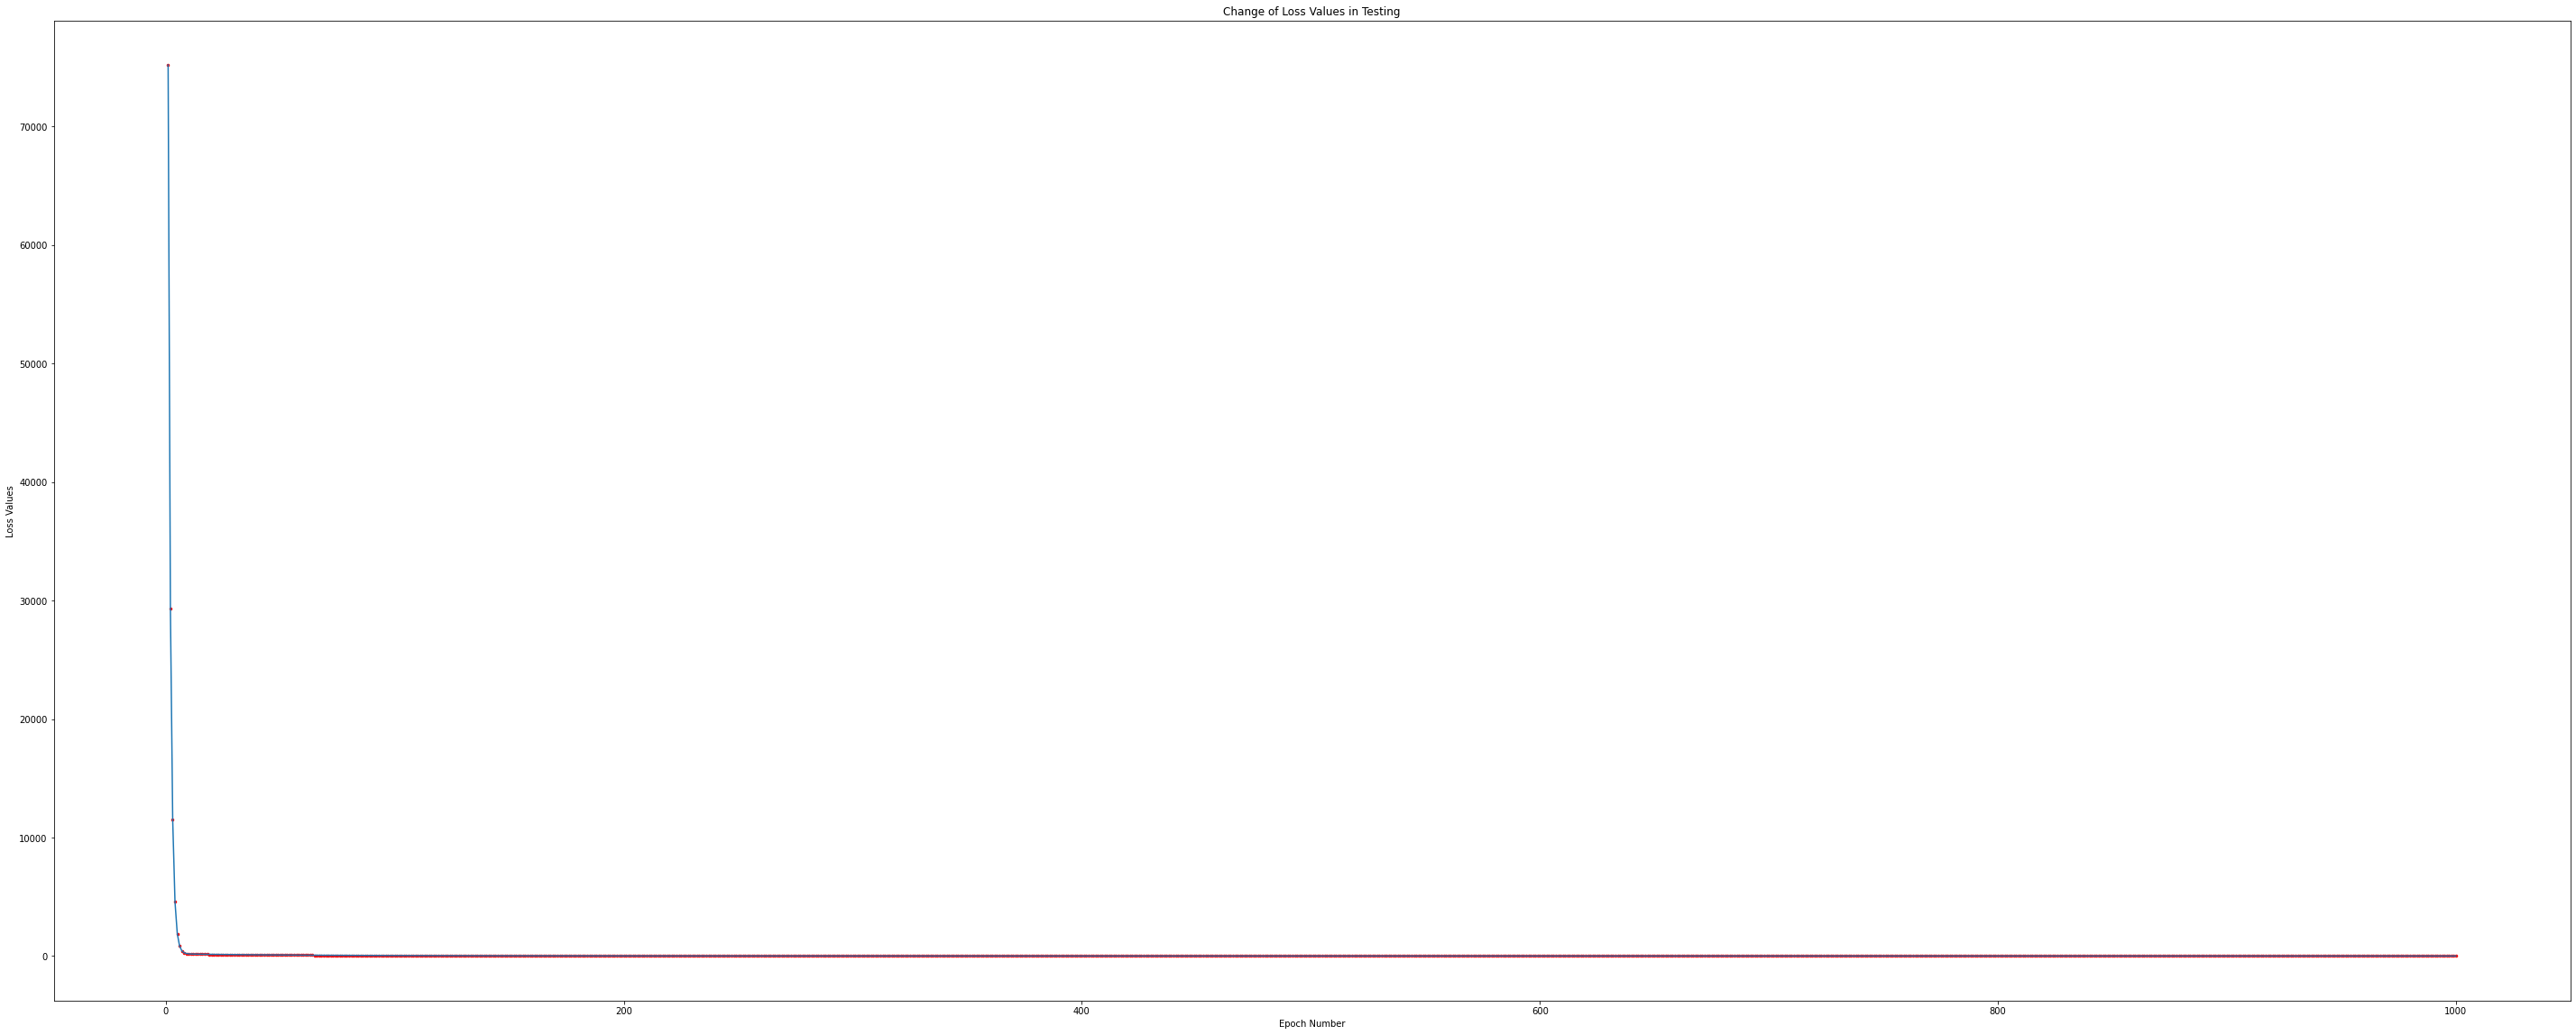

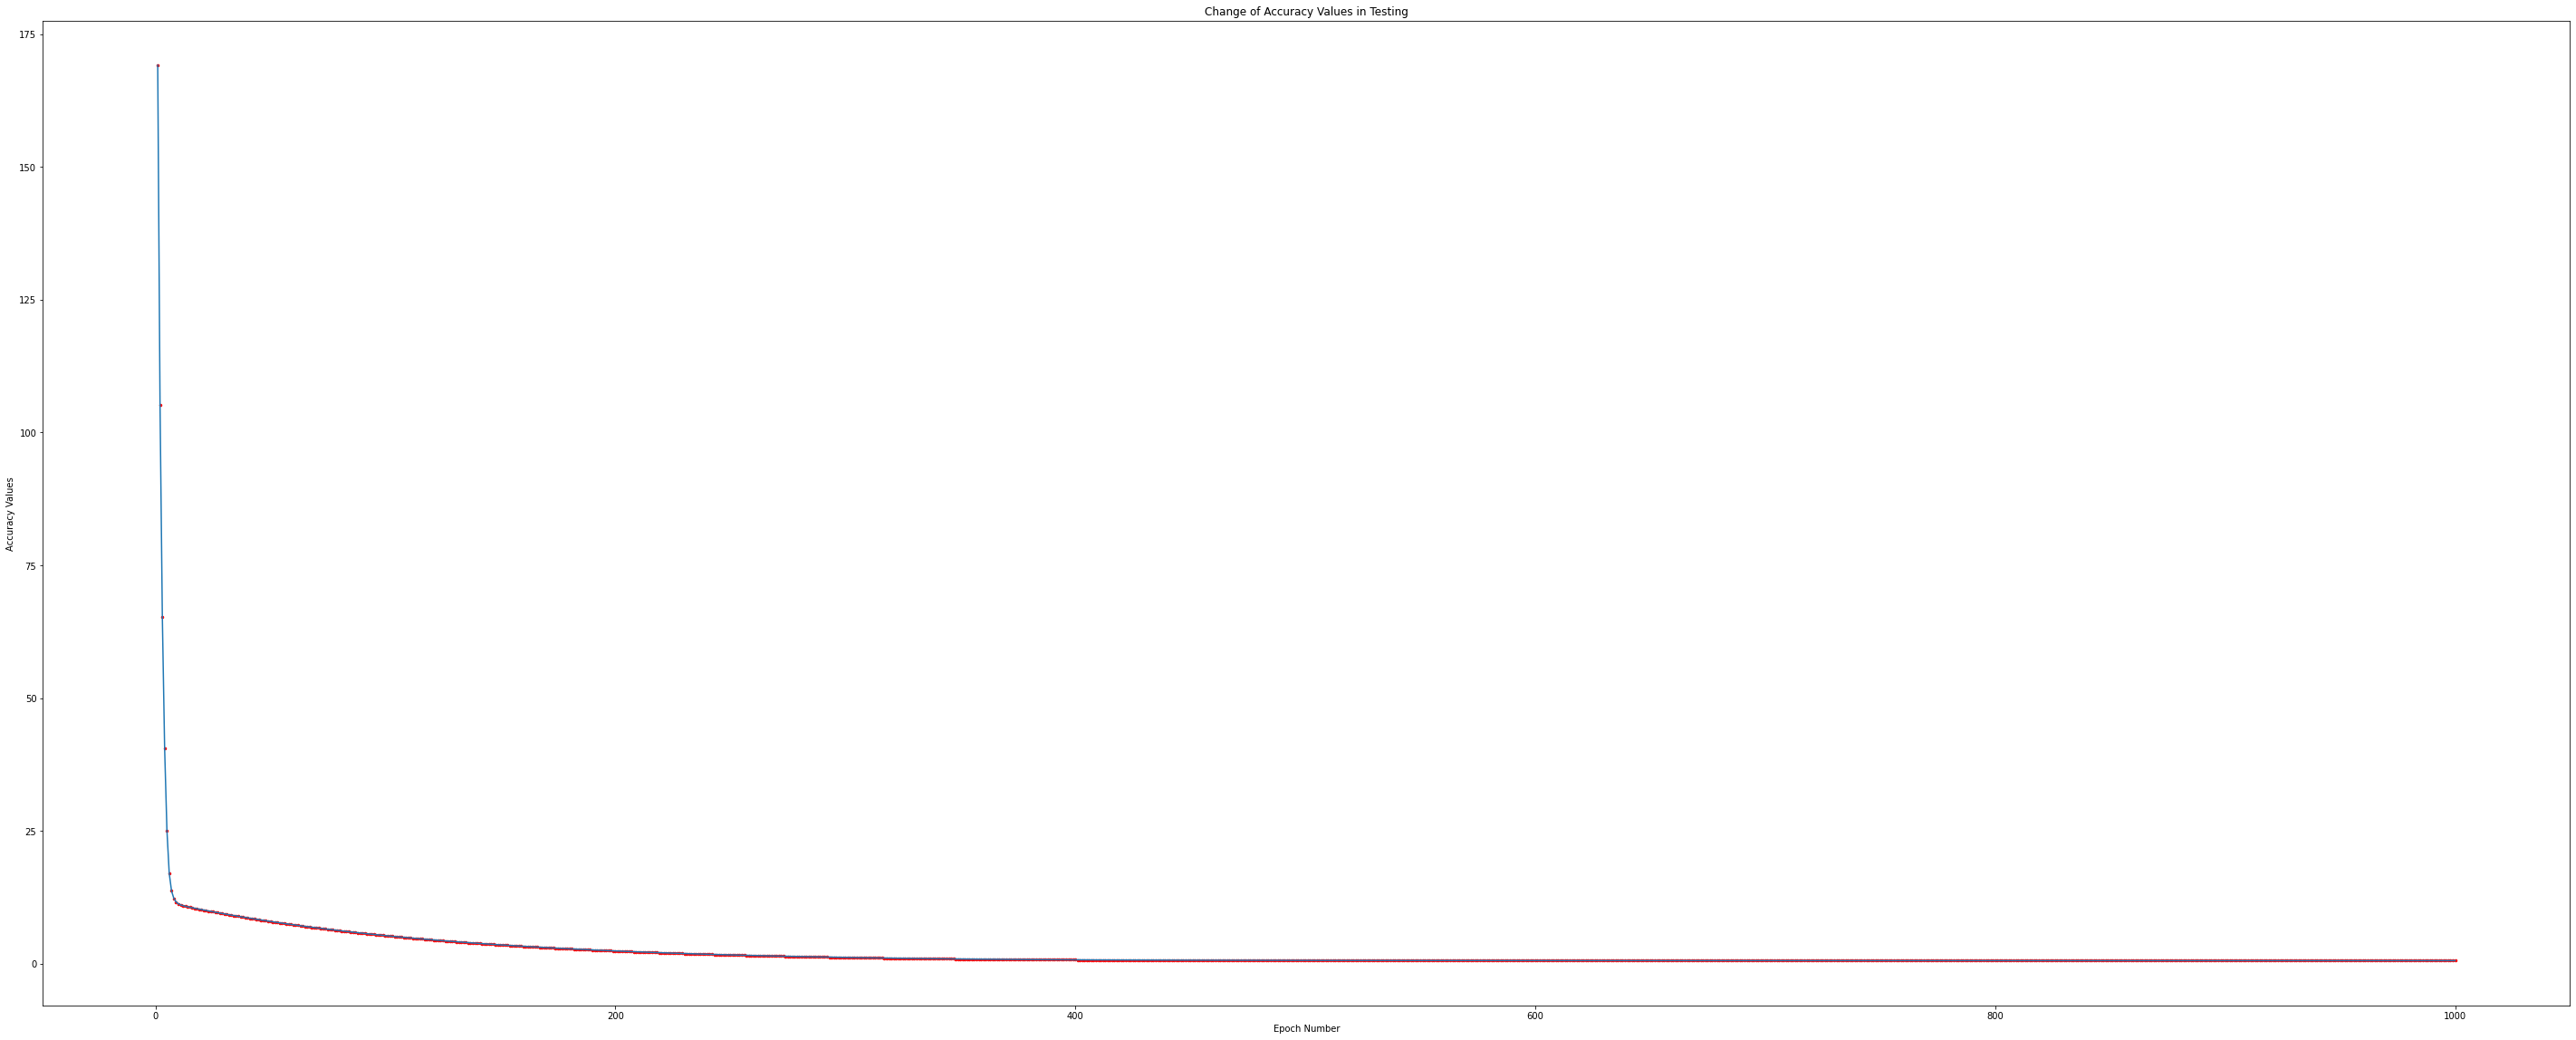

Description of Loss Values in Testing
                  0
count   1000.000000
mean     134.763438
std     2580.324732
min        0.555005
25%        0.556023
50%        0.603803
75%        3.550252
max    75193.000000

Description of Accuracy Values in Testing
                 0
count  1000.000000
mean      2.157303
std       7.084272
min       0.580831
25%       0.583156
50%       0.622557
75%       1.652211
max     169.131924


In [15]:
loss_valuesT = return_lists[2];
accuracy_valuesT = return_lists[3];

y=np.arange(1,1001);

plt.figure(figsize=(50, 20));
plt.plot(y, loss_valuesT);

plt.title("Change of Loss Values in Testing");
plt.xlabel("Epoch Number");
plt.ylabel("Loss Values");

plt.scatter(y, loss_valuesT, label= "dot", color= "red", marker= ".", s=25);

plt.show();

plt.figure(figsize=(50, 20));
plt.plot(y, accuracy_valuesT);

plt.title("Change of Accuracy Values in Testing");
plt.xlabel("Epoch Number");
plt.ylabel("Accuracy Values");

plt.scatter(y, accuracy_valuesT, label= "dot", color= "red", marker= ".", s=25);

plt.show();

print("Description of Loss Values in Testing");
df = pd.DataFrame(loss_valuesT);
x = df.describe();
print(x);
print();
print("Description of Accuracy Values in Testing");
df2 = pd.DataFrame(accuracy_valuesT);
y = df2.describe();
print(y);

In [16]:
prediction = lrm.predict(x_test, y_test);

prediction_result = [round(num) for num in prediction]
expected_result = z_test;

print("Test Features Expected Results")
print(expected_result)
print()
print("Prediction Results")
print(prediction_result)
print()
print("Actual Prediction Results")
print(prediction)

Test Features Expected Results
[1, 5, 0, 5, 3, 5, 3, 4, 3, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 5, 2, 4, 5, 5, 5, 5, 1, 5, 5, 4, 0, 3, 3, 4, 2, 3, 1, 1, 5, 5, 4, 4, 4, 4, 5, 2, 5, 4, 3, 3, 4, 5, 5, 2, 4, 3, 4, 5, 4, 2, 4, 5, 4, 5, 5, 1, 5, 5, 5, 2, 2, 5, 3, 5, 4, 5, 4, 5, 5, 4, 2, 2, 3, 3, 5, 4, 2, 2, 2, 5, 5, 4, 5, 3, 4, 4, 3, 4, 4, 2, 5, 2, 2, 2, 2, 5, 4, 5, 1, 4, 1, 4, 5, 4, 5, 3, 4, 5, 4, 3, 5, 1, 2, 4, 5, 5, 5, 5, 3, 5, 5, 5, 2, 5, 4, 3, 2, 2, 2, 2, 3, 5, 3, 5, 5, 4, 2, 4, 4, 5, 2, 5, 5, 5, 1, 4, 5, 5, 5, 4, 5, 2, 5, 1, 5, 4, 1, 1, 4, 4, 4, 4, 2, 5, 5, 4, 2, 5, 5, 5, 1, 5, 4, 2, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 5, 0, 2, 2, 4, 2, 4, 5, 4, 5, 5, 2, 5, 5, 5, 3, 5, 5, 2, 5, 3, 4, 5, 2, 2, 5, 5, 4, 4, 4, 4, 5, 2, 4, 5, 2, 5, 1, 5, 5, 4, 5, 5, 5]

Prediction Results
[2, 6, 1, 4, 3, 6, 3, 3, 2, 5, 5, 6, 5, 2, 4, 4, 5, 5, 5, 5, 2, 3, 3, 5, 5, 5, 2, 5, 4, 4, 2, 3, 3, 4, 3, 2, 2, 2, 5, 3, 4, 5, 5, 3, 6, 2, 4, 2, 4, 2, 3, 5, 6, 3, 3, 3, 3, 5, 4, 3, 4, 5, 4, 5, 3, 2, 5, 6, 5, 2, 2, 5, 3, 5, 3, 5, 4, 4,

<span style="color: darkblue;">NOTE</span> => The actual prediction values are used to calculate accuracy with Mean Error. The accuracy values are rounded to just show properly.

<span style="color: darkblue;">NOTE</span> => In Training part, we have 1000 epoch. That's why, I did not print the output of the expected output and our output after each epoch turn. 

# <span style="color: red;">Results</span>

<span style="color: darkblue;">NOTE</span> => Loss and Accuracy graphics are in the Trainig and Testing section of the report!

In [20]:
asd = lrm.predict(x_test, y_test)
err = 0
for i in range (len(y_test)):
    err = err + abs(z_test[i] - asd[i])
err = err / len(y_test)
print("After we train our model, this is the last Mean Absolute Error Value for test data:")
print(err)

After we train our model, this is the last Mean Absolute Error Value for test data:
0.5808307740977067


##  <span style="color: darkblue;">m1, m2 and b Values </span> 

In [17]:
r = lrm.values();
m1 = r[0]
m2 = r[1]
b = r[2]
print("m1: ", m1);
print("m2: ", m2);
print("b: ", b);

m1:  -0.002357128646630796
m2:  0.03869482879600432
b:  -0.005652989103906824


"Loss Values" and "Accuracy Values" charts for test and training data are available below the relevant sections in the report.

When we start to train our lineer regression model, during the first epochs accuracy values are like -170. 
This is because we randomly selected the initial assigned values for m1, m2, and b. 
After we train our model, accuracy values narrow down to 0.5 and 0.7 range.
Because in every epoch, we calculate again loss value, m1, m2 and b according to result of last epoch.

Same goes for loss values. During the first epochs it is too high. This is also because we randomly selected the initial assigned values for m1, m2 and b. After the model is trained, accuracy values narrow down to 0.5 and 0.6 range as similar as accuracy values in training. But there is no overfitting. The accuracy value is lower than training as we expected. If we think about the overfitting graphic that we talked in our lectures, accuracy of training is usually more than testing.  